Kolom dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

=== Decision Tree ===
Confusion Matrix:
 [[30 11]
 [14 36]]
Accuracy : 0.7253
Precision: 0.7660
Recall   : 0.7200
F1-Score : 0.7423
AUC      : 0.7259
TP=36, TN=30, FP=11, FN=14

=== Random Forest ===
Confusion Matrix:
 [[30 11]
 [ 8 42]]
Accuracy : 0.7912
Precision: 0.7925
Recall   : 0.8400
F1-Score : 0.8155
AUC      : 0.8680
TP=42, TN=30, FP=11, FN=8

=== Logistic Regression ===
Confusion Matrix:
 [[28 13]
 [10 40]]
Accuracy : 0.7473
Precision: 0.7547
Recall   : 0.8000
F1-Score : 0.7767
AUC      : 0.8595
TP=40, TN=28, FP=13, FN=10

Model terbaik berdasarkan akurasi: Random Forest
Model terbaik disimpan ke 'kelompok.pkl'
Hasil evaluasi disimpan ke 'hasil_perbandingan.xlsx'


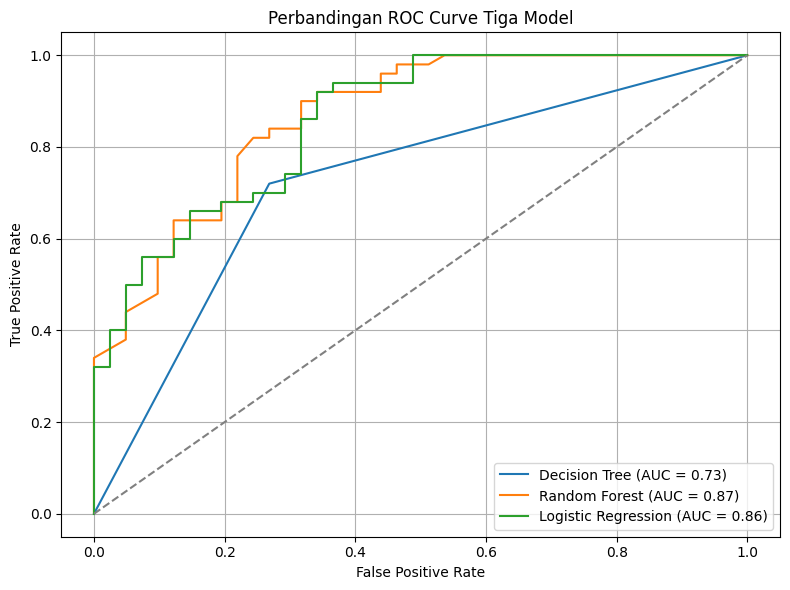


Grafik ROC Curve disimpan sebagai 'roc_curve.png'

=== Contoh Prediksi Menggunakan Model ===
Kolom fitur yang digunakan: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Ini yang sehat

Prediksi: 0 (Sehat)
Probabilitas risiko: 11.00%

Ini yang berisiko penyakit jantung

Prediksi: 1 (Berisiko penyakit jantung)
Probabilitas risiko: 99.00%

=== Hasil TP, TN, FP, FN ===
Confusion Matrix:
[[127  11]
 [  8 157]]
True Negative (TN): 127
False Positive (FP): 11
False Negative (FN): 8
True Positive (TP): 157
Hasil TP, TN, FP, FN disimpan ke sheet 'Confusion_Matrix' di hasil_perbandingan.xlsx


In [1]:
# ===============================================
# KELAS: 05TPLE016
# KELOMPOK 1
# TUGAS : Machine Learning - 3 Algoritma
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from openpyxl import Workbook

# ===============================================
# 1. LOAD DATASET
# ===============================================
df = pd.read_csv("heart.csv")
print("Kolom dataset:", df.columns)

# Pisahkan fitur (X) dan target (y)
X = df.drop("target", axis=1)
y = df["target"]

# Bagi data menjadi 70% training dan 30% testing
x_train, x_temp, y_temp, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y

)

# ===============================================
# 2. INISIALISASI 3 MODEL DAN LATIH
# ===============================================
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

hasil = []
roc_data = {}

for nama, model in models.items():
    model.fit(x_train, y_temp)
    y_pred = model.predict(x_temp)
    y_prob = model.predict_proba(x_temp)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # === Tambahan: Precision, Recall, F1 ===
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n=== {nama} ===")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"AUC      : {auc:.4f}")
    print(f"TP={tp}, TN={tn}, FP={fp}, FN={fn}")

    hasil.append({
        "Model": nama,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "Model_Obj": model
    })

    # Simpan data untuk ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[nama] = (fpr, tpr, auc)

# ===============================================
# 3. PILIH MODEL TERBAIK DAN SIMPAN
# ===============================================
df_hasil = pd.DataFrame(hasil)[[
    "Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC",
    "TP", "TN", "FP", "FN"
]]

best = max(hasil, key=lambda x: x["Accuracy"])
best_model = best["Model_Obj"]
best_name = best["Model"]

print(f"\nModel terbaik berdasarkan akurasi: {best_name}")

# Simpan model dan nama fitur
joblib.dump(best_model, "kelompok.pkl")
joblib.dump(list(X.columns), "feature_names.pkl")
print("Model terbaik disimpan ke 'kelompok.pkl'")

# ===============================================
# 4. SIMPAN HASIL KE EXCEL
# ===============================================
df_hasil.to_excel("hasil_perbandingan.xlsx", index=False)
print("Hasil evaluasi disimpan ke 'hasil_perbandingan.xlsx'")

# ===============================================
# 5. PLOT DAN SIMPAN ROC CURVE
# ===============================================
plt.figure(figsize=(8, 6))
for nama, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{nama} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("Perbandingan ROC Curve Tiga Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.show()

print("\nGrafik ROC Curve disimpan sebagai 'roc_curve.png'")

# ===============================================
# 6. CONTOH PREDIKSI MENGGUNAKAN MODEL
# ===============================================
print("\n=== Contoh Prediksi Menggunakan Model ===")
mdl = joblib.load("kelompok.pkl")
feature_names = joblib.load("feature_names.pkl")

print("Kolom fitur yang digunakan:", feature_names)

print(f"")

# Contoh data input manual
print(f"Ini yang sehat")
sample = pd.DataFrame([{
    "age": 52,
    "sex": 1,
    "cp": 0,
    "trestbps": 125,
    "chol": 212,
    "fbs": 0,
    "restecg": 1,
    "thalach": 168,
    "exang": 0,
    "oldpeak": 1.0,
    "slope": 2,
    "ca": 2,
    "thal": 3
}])

sample = sample[feature_names]

pred = int(mdl.predict(sample)[0])
prob = mdl.predict_proba(sample)[0][1]

print(f"\nPrediksi: {pred} ({'Berisiko penyakit jantung' if pred==1 else 'Sehat'})")
print(f"Probabilitas risiko: {prob*100:.2f}%")

print(f"")

# Contoh data kedua
print(f"Ini yang berisiko penyakit jantung")
sample = pd.DataFrame([{
    "age": 38,
    "sex": 1,
    "cp": 2,
    "trestbps": 138,
    "chol": 175,
    "fbs": 0,
    "restecg": 1,
    "thalach": 173,
    "exang": 0,
    "oldpeak": 0,
    "slope": 2,
    "ca": 4,
    "thal": 2
}])

sample = sample[feature_names]

pred = int(mdl.predict(sample)[0])
prob = mdl.predict_proba(sample)[0][1]

print(f"\nPrediksi: {pred} ({'Berisiko penyakit jantung' if pred==1 else 'Sehat'})")
print(f"Probabilitas risiko: {prob*100:.2f}%")

# ===============================================
# 7. HITUNG TP, TN, FP, FN DARI MODEL DAN DATASET ASLI
# ===============================================
print("\n=== Hasil TP, TN, FP, FN ===")

df = pd.read_csv("heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

mdl = joblib.load("kelompok.pkl")

y_pred = mdl.predict(X)

cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

with pd.ExcelWriter("hasil_perbandingan.xlsx", mode="a", engine="openpyxl") as writer:
    df_cm = pd.DataFrame([[tn, fp, fn, tp]], columns=["TN", "FP", "FN", "TP"])
    df_cm.to_excel(writer, sheet_name="Confusion_Matrix", index=False)

print("Hasil TP, TN, FP, FN disimpan ke sheet 'Confusion_Matrix' di hasil_perbandingan.xlsx")
